In [1]:
import random
import numpy as np
import numpy.matlib
import pandas as pd

csv_data = pd.read_csv('trade_new.csv')  

In [2]:
from datetime import datetime, timedelta

csv_data["purTime"] = csv_data["sldatime"].apply(lambda x:datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
purTimeMax = max(csv_data["purTime"])
csv_data["level"] = csv_data["purTime"].apply(lambda x: 4 if (purTimeMax-x).days <= 1*30 
                                                              else(3 if (purTimeMax-x).days <=2*30 
                                                                   else(2 if (purTimeMax-x).days <=4*30
                                                                       else 1)))
csv_data

,uid,sldatime,pno,cno,cmrid,vipno,id,pluno,bcd,pluname,...,bndname,qty,amt,disamt,ismmx,mtype,mdocno,isdel,purTime,level
0,16072913541329219,2016-07-29 13:54:22,13,8323,男[45 以上],2900003115009,2,22002240,200328600506004228,红油桃（中）,...,NaN,0.422,5.06,0.0,0,NaN,NaN,0,2016-07-29 13:54:22,4
1,16060809581811553,2016-06-08 09:58:40,18,8334,女[18 - 25],2900001575201,5,34150006,6926458841290,MSU男童平脚裤 74129,...,真想你,1.000,27.90,0.0,0,NaN,NaN,0,2016-06-08 09:58:40,3
2,16022416071404989,2016-02-24 16:07:08,14,8305,女[31 - 45],1591040161114,2,11054040,6910019008819,雕牌超效加酶洗衣粉4000g,...,NaN,1.000,33.90,0.0,0,NaN,NaN,0,2016-02-24 16:07:08,1
3,16052118091609506,2016-05-21 18:09:33,16,8308,女[18 - 25],1591016439575,2,27400855,211211400800000011,菜煎饼,...,NaN,0.001,8.00,0.0,0,NaN,NaN,0,2016-05-21 18:09:33,2
4,16040315451414179,2016-04-03 15:45:23,14,8306,女[18 - 25],1591015027858,2,11110121,111101214,欧莱雅系列,...,NaN,39.000,39.00,0.0,0,NaN,NaN,0,2016-04-03 15:45:23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22594,16072318461403789,2016-07-23 18:46:14,14,8305,女[18 - 25],2900000476042,2,10100010,5290074003198,果芬100%橙汁1L,...,进口品牌,1.000,15.80,0.0,0,NaN,NaN,0,2016-07-23 18:46:14,4
22595,16071517501803300,2016-07-15 17:50:04,18,8306,女[18 - 25],1591016440328,9,15209032,5900120010024,罗兹姑娘全脂牛奶1L,...,进口食品,1.000,13.80,0.0,0,NaN,NaN,0,2016-07-15 17:50:04,4
22596,16070214021428532,2016-07-02 14:02:44,14,8323,女[18 - 25],2900000448520,4,15209031,5900159000133,乐途全脂牛奶1L,...,进口食品,1.000,13.80,0.0,0,NaN,NaN,0,2016-07-02 14:02:44,4
22597,16072518331809369,2016-07-25 18:33:15,18,8337,男[45 以上],2900000604360,13,15209031,5900159000133,乐途全脂牛奶1L,...,进口食品,1.000,13.80,0.0,0,NaN,NaN,0,2016-07-25 18:33:15,4


In [3]:
class DictFTCTree():
    
    def __init__(self, custProd = 1, dictTreeNodes = 1):
        if type(dictTreeNodes) != int:
            self.nodes = dictTreeNodes
        elif type(custProd) != int:
            self.nodes = {}
            self.create(custProd)
        else:
            self.nodes = {}
        
    def create(self, custProd):
        custProd = custProd.loc[:,["pluno", "level"]].sort_values("pluno")
        for i in custProd.itertuples():
            for j in range(i.level):
                pluno = int(str(i.pluno)[:j+2])
                if pluno in self.nodes.keys():
                    self.nodes[pluno] = self.nodes[pluno] + 1
                else:
                    self.nodes[pluno] = 1
    def show(self):
        print(self.nodes)
    
    def union(self, other):
        newNodes = self.nodes.copy()
        for i in other.nodes.keys():
            if i in newNodes.keys():
                newNodes[i] = newNodes[i] + other.nodes[i]
            else:
                newNodes[i] = other.nodes[i]
        return DictFTCTree(dictTreeNodes=newNodes)
    
    def intersection(self, other):
        newNodes = {}
        for i in self.nodes.keys():
            if i in other.nodes.keys():
                newNodes[i] = self.nodes[i] + other.nodes[i]
        return DictFTCTree(dictTreeNodes=newNodes)

In [4]:
customer = csv_data.groupby('vipno').count().index
userGroup = []
userToTree = {}
for i in customer:
    userGroup.append(i)
    userToTree[i] = DictFTCTree(custProd=csv_data[csv_data["vipno"] == i])

In [19]:
import sys

def Dist(FTCTree, freq):
    IRTree = FTCTree.intersection(freq)
#     IRTree.show()
    URTree = FTCTree.union(freq)
#     URTree.show()
    # 全部数量
    URSum = 0
    for i in URTree.nodes:
        if i <= 99:
            URSum = URSum + URTree.nodes[i]
    sim1 = 0
    type2 = {}
    type3 = {}
    type4 = {}
    for i in IRTree.nodes:
        if i <= 99:
            sim1 = sim1 + IRTree.nodes[i]
        elif i >= 100 and i <= 999:
            key = int(i/10)
            if key in type2:
                type2[key] = type2[key] + IRTree.nodes[i]
            else:
                type2[key] = IRTree.nodes[i]
        elif i >= 1000 and i <= 9999:
            key = int(i/10)
            if key in type3:
                type3[key] = type3[key] + IRTree.nodes[i]
            else:
                type3[key] = IRTree.nodes[i]
        else:
            key = int(i/10)
            if key in type4:
                type4[key] = type4[key] + IRTree.nodes[i]
            else:
                type4[key] = IRTree.nodes[i]
    sim1 = sim1/URSum
    sim2 = 0
    for i in type2:
        sim2 = sim2 + type2[i]/URTree.nodes[i]
    if len(type2) != 0:
        sim2 = sim2/len(type2)
    sim3 = 0
    for i in type3:
        sim3 = sim3 + type3[i]/URTree.nodes[i]
    if len(type3) != 0:
        sim3 = sim3/len(type3)
    sim4 = 0
    for i in type4:
        sim4 = sim4 + type4[i]/URTree.nodes[i]
    if len(type4) != 0:
        sim4 = sim4/len(type4)
    wl = None
    if sim4 != 0:
        wl = [1/10, 2/10, 3/10, 4/10]
    elif sim4 == 0 and sim3 != 0:
        wl = [1/6, 2/6, 3/6, 0]
    elif sim4 == 0 and sim3 == 0 and sim2 != 0:
        wl = [1/3, 2/3, 0, 0]
    else:
        wl = [1, 0, 0, 0]
#     print(type2, type3, type4, URSum, sim1, sim2, sim3, sim4, wl)
    return (1-(sim1*wl[0] + sim2*wl[1] + sim3*wl[2] + sim4*wl[3]))           

def GetCT(userList):
    ct = None
    utree = DictFTCTree()
    for i in userList:
        utree = utree.union(userToTree[i])
    freq = 1
    mindist = sys.maxsize
    freqStep = 0
    for i in utree.nodes.values():
        freqStep = freqStep + i
    freqStep = int(freqStep / len(utree.nodes))
    freqEnd = max(utree.nodes.values())
    while freq <= freqEnd:
        deleteKeys = [] 
        for i in utree.nodes.keys():
            if utree.nodes[i] < freq:
                deleteKeys.append(i)
        for i in deleteKeys:
            utree.nodes.pop(i)
        dist = 0
        for i in userList:
            dist = dist + Dist(userToTree[i], utree)
        if dist < mindist:
            mindist = dist
            ct = utree
        freq = freq + freqStep
    return ct

In [6]:
import numpy as np
import numpy.matlib

matrixPD = pd.DataFrame(data=np.matlib.zeros((len(userToTree),len(userToTree))),
                       index=userGroup, columns=userGroup)
for i in range(len(userGroup)):
    for j in range(i+1, len(userGroup)):
        matrixPD.loc[userGroup[i], userGroup[j]] = matrixPD.loc[userGroup[j], userGroup[i]] = Dist(userToTree[userGroup[i]], userToTree[userGroup[j]])        
matrixPD

,781924,13325038116,13854627199,13864739266,15954611837,15954688237,15963883482,15963885355,18554652702,18654692914,...,2900003115009,2900003116341,2900003116822,2900003117386,2900003120607,2900003122076,2900003123479,6222021615010082737,6227002180901670266,6227002180921663895
781924,0.000000,0.321872,0.406667,0.272487,0.337871,0.298268,0.412230,0.561111,0.336526,0.425864,...,0.337071,1.000000,0.450066,0.539683,0.304244,0.487374,0.374491,0.170563,0.557880,0.461501
13325038116,0.321872,0.000000,0.415721,0.273124,0.266013,0.207341,0.446345,0.390805,0.407209,0.349217,...,0.363871,0.542857,0.387706,0.200478,0.218801,0.243056,0.433798,0.354456,0.524976,0.303114
13854627199,0.406667,0.415721,0.000000,0.253535,0.332501,0.374290,0.670919,0.305577,0.364470,0.495526,...,0.455997,0.154514,0.213333,0.416491,0.427393,0.361718,0.474355,0.603943,0.524977,0.442994
13864739266,0.272487,0.273124,0.253535,0.000000,0.172517,0.208746,0.288781,0.179164,0.308680,0.406089,...,0.235150,0.428322,0.380081,0.278518,0.358368,0.481491,0.270459,0.222950,0.481867,0.375547
15954611837,0.337871,0.266013,0.332501,0.172517,0.000000,0.399000,0.494935,0.347526,0.230999,0.488579,...,0.203778,0.333333,0.706199,0.307361,0.395968,0.578013,0.519552,0.252375,0.465002,0.342044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900003122076,0.487374,0.243056,0.361718,0.481491,0.578013,0.415442,0.648922,0.381925,0.507758,0.513651,...,0.352941,0.684848,0.515152,0.555239,0.457781,0.000000,0.459428,0.458113,0.425806,0.293784
2900003123479,0.374491,0.433798,0.474355,0.270459,0.519552,0.377950,0.514543,0.397747,0.328829,0.445764,...,0.520437,0.413095,0.503640,0.440972,0.412364,0.459428,0.000000,0.523946,0.538166,0.411662
6222021615010082737,0.170563,0.354456,0.603943,0.222950,0.252375,0.139044,0.424757,0.570938,0.341713,0.371228,...,0.329897,0.567677,0.165069,0.209877,0.371419,0.458113,0.523946,0.000000,0.524077,0.337662
6227002180901670266,0.557880,0.524976,0.524977,0.481867,0.465002,0.490494,0.479749,0.546369,0.441304,0.505733,...,0.574200,0.761905,0.586027,0.505621,0.516149,0.425806,0.538166,0.524077,0.000000,0.336260


In [60]:
import math

def getProductNum(userList):
    proSet = set()
    for i in userList:
        for k in userToTree[i].nodes.keys():
            if k>=10000:
                proSet.add(k)
    return len(proSet)

def likelihood(cluster, ct , N, D, sizeOfC = 1):
    N_i = len(cluster)
    variance = 0
    if N_i > sizeOfC:
        for i in cluster:
            variance = variance + (Dist(userToTree[i] ,ct) ** 2)
        variance = variance / (N_i - sizeOfC)
    if N_i <= 0 or N <= 0 or variance <= 0:
        return 0
    return N_i*math.log(N_i) - N_i*math.log(N) - N_i/2*math.log(2*math.pi) - N_i*D/2*math.log(variance) - (N_i - sizeOfC)/2

def Bic(clusters, cts):
    # ct == 1, cluster = []
    if type(cts) == DictFTCTree:
        N = len(clusters)
        D = getProductNum(clusters)
        return likelihood(clusters, cts, N, D, 1) - (D + 1)/2*math.log(1)
    else:
        new = []
        new.extend(clusters[0])
        new.extend(clusters[1])
        N = len(new)
        D = getProductNum(new)
        return likelihood(clusters[0], cts[0], N, D, 2) + likelihood(clusters[1], cts[1], N, D, 2) - 2*(D + 1)/2*math.log(2)


In [62]:
def kmeans2(userList):
    iniA = 0
    iniB = 0
    maxDistance = 0
    for i in range(len(userList)):
        for j in range(i+1, len(userList)):
            if matrixPD.loc[userList[i], userList[j]] > maxDistance:
                iniA = userList[i]
                iniB = userList[j]
                maxDistance = matrixPD.loc[userList[i], userList[j]]
    cluster1 = [iniA]
    cluster2 = [iniB]
    ct1 = GetCT(cluster1)
    ct2 = GetCT(cluster2)
    for i in userList:
        if i == iniA or i == iniB:
            continue
        distance1 = Dist(userToTree[i], ct1)
        distance2 = Dist(userToTree[i], ct2)
        if distance1 >= distance2:
            cluster2.append(i)
            ct2 = GetCT(cluster2)
        else:
            cluster1.append(i)
            ct1 = GetCT(cluster1)
    return ([cluster1, cluster2], [ct1, ct2])
    

In [63]:
from collections import deque

finshDeque = deque()
waitingDeque = deque()
waitingDeque.append(userGroup)
while len(waitingDeque) != 0:
    userListBefore = waitingDeque.popleft()
    ctBefore = GetCT(userListBefore)
    bicBefore = Bic(userListBefore, ctBefore)
    kmeans = kmeans2(userListBefore)
    bicAfter = Bic(kmeans[0], kmeans[1])
    if bicAfter >= bicBefore:
        for i in kmeans[0]:
            if len(i) > 2:
                waitingDeque.append(i)
            else:
                finshDeque.append(i)
    else:
        finshDeque.append(userListBefore)
finshDeque

deque([[781924,
        13325038116,
        13864739266,
        1590142152440,
        1590142176354,
        1590142179621,
        1590151427355,
        1590151500423,
        1590151829753,
        1591012978559,
        1591015034924,
        1591015112424,
        1591015454142,
        1591015456993,
        1591015598785,
        1591016162466,
        1591016382857,
        1591020695158,
        1595140612422,
        1595150997786,
        1595151355660,
        1595151630774,
        1598140055923,
        2900000060012,
        2900000138223,
        2900000254503,
        2900000304376,
        2900000384187,
        2900000574274,
        2900000623040,
        2900000776104,
        2900001222099,
        2900001240246,
        2900001582933,
        2900001645768,
        2900002944495,
        2900003116341],
       [2900001137843, 2900000780835, 2900000855502],
       [1593140971419,
        13854627199,
        15954611837,
        15963883482,
        15963885355

In [64]:
sc = 0
pointNum = len(finshDeque)
for i in range(pointNum):
    if len(finshDeque[i]) == 0:
        continue
    for customerId in finshDeque[i]:
        a = 0
        b = 0
        for j in range(pointNum):
            if i == j:
                for otherC in finshDeque[j]:
                    if otherC != customerId:
                        a = a + matrixPD.loc[customerId, otherC]
            else:
                for otherC in finshDeque[j]:
                    b = b + matrixPD.loc[customerId, otherC]
        if len(finshDeque[i]) == 1:
            a = 0
        else:
            a = a/(len(finshDeque[i])-1)
        if len(finshDeque[i]) == len(userGroup):
            b = 0
        else:
            b = b/(len(userGroup)-len(finshDeque[i]))
        sc = sc + (b-a)/max(a, b)
sc = sc/len(userGroup)

# 计算cp
cp = 0
for i in range(pointNum):
    if len(finshDeque[i]) == 0:
        cp = cp + 1
        continue
    cpi = 0
    ct = GetCT(finshDeque[i])
    for j in finshDeque[i]:
        cpi = cpi + Dist(userToTree[j], ct)
    cp = cp + cpi/len(finshDeque[i])
cp = cp/pointNum

In [65]:
print(pointNum, sc, cp)

4 0.1891903476834318 0.2892497847626551


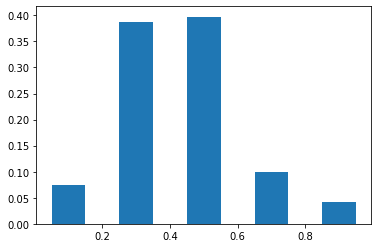

In [13]:
import matplotlib.pyplot as plt

size = len(userGroup)
distance_x_ls = [0.1,0.3,0.5,0.7,0.9]
percentage_ls = [0,0,0,0,0]
for i in range(size):
    for j in range(i+1, size):
        temp = matrixPD.loc[userGroup[i], userGroup[j]]
        if temp <= 0.2:
            percentage_ls[0] = percentage_ls[0] + 1
        elif temp <= 0.4:
            percentage_ls[1] = percentage_ls[1] + 1
        elif temp <= 0.6:
            percentage_ls[2] = percentage_ls[2] + 1
        elif temp <= 0.8:
            percentage_ls[3] = percentage_ls[3] + 1
        else:
            percentage_ls[4] = percentage_ls[4] + 1
total = sum(percentage_ls)
for i in range(5):
    percentage_ls[i] = percentage_ls[i] / total
plt.bar(distance_x_ls, percentage_ls, 0.1)
plt.show()